In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
import sys


# Add the path to the 'scripts' folder directly
sys.path.append('/Users/mncavieres/Documents/2024-2/HVS')


# Now you can import from the 'scripts' package
from scripts.implied_d_vr import *  # Or import any other module
from scripts.selections import *
from scripts.CMD_selection import *


# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})

# Enable LaTeX rendering
plt.rc('text', usetex=True)


# Inform a decision on an extinction limit for HVS selection

We will progresively apply extinction cuts on speedystar simulated HVS and check on the completeness that we get, then apply a reasonable cut that will not limit completeness too much, while also allowing for enough Gaia information

In [4]:
data = pd.read_csv('/Users/mncavieres/Documents/2024-2/HVS/Data/CMD_training_catalogs/kappa_1.7_speedystar_with_probabilities.csv')
data_hvs = data.loc[data['is_hvs'] == 1]

# Histogram of extinction

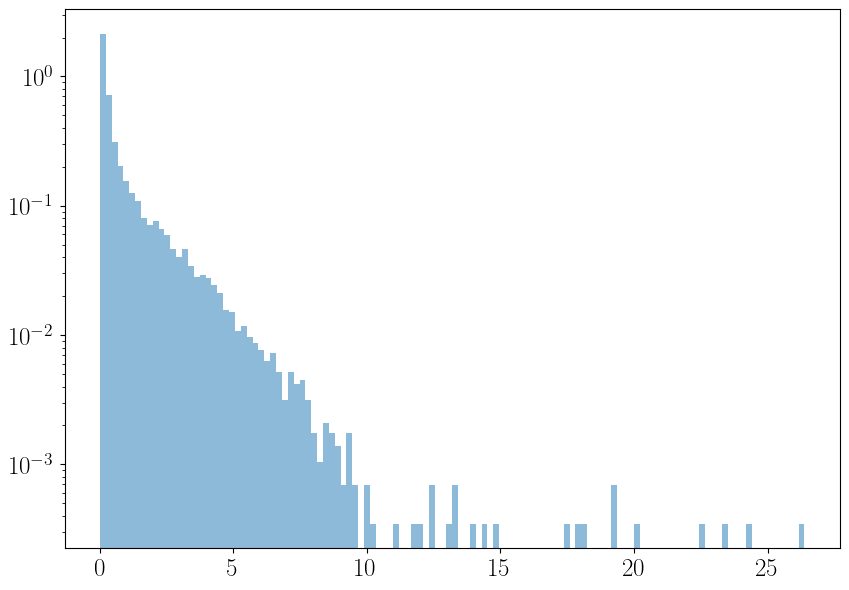

In [8]:
plt.figure()
plt.hist(data_hvs['A_G'], bins='scott', density=True, label='HVS', alpha=0.5)
plt.yscale('log')
plt.show()

In [9]:
# compute the completeness as a function of A_G limit
completeness = []
for ag in np.arange(0, 5, 0.1):
    data_ag = data_hvs.loc[data_hvs['A_G'] < ag]
    completeness.append(len(data_ag)/len(data_hvs))

In [ ]:
# define an interpolator for the completeness
from scipy.interpolate import interp1d
completeness_interpolator = interp1d(np.arange(0, 5, 0.1), completeness)

# compute the completeness at 0.3 mag
sills_limit_completeness = completeness_interpolator(0.3)

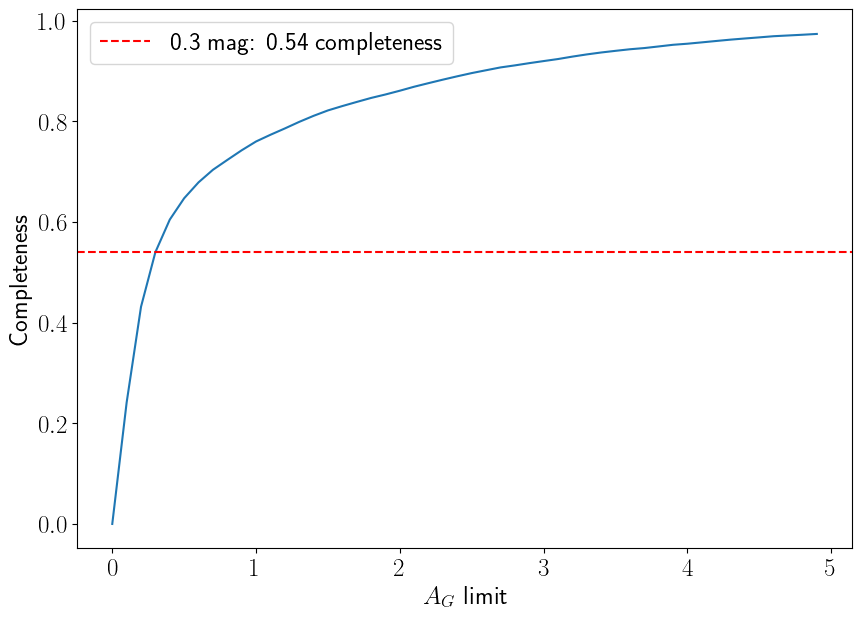

In [16]:
# plot the completeness
plt.figure()
plt.plot(np.arange(0, 5, 0.1), completeness)
plt.axhline(sills_limit_completeness, color='r', linestyle='--', label= f'0.3 mag: {sills_limit_completeness:.2f} completeness')
plt.xlabel(r'$A_G$ limit')
plt.ylabel('Completeness')
plt.legend()
plt.show()

In [24]:
# create a limit interpolator function
limit_interpolator = interp1d(completeness, np.arange(0, 5, 0.1)) 

# compute the limit for 90% completeness
limit_90_completeness = limit_interpolator(0.9)
print(f'The 90% completeness limit is {limit_90_completeness:.2f} mag')

The 90% completeness limit is 2.57 mag
